# Introduction

In this project, I analyzed customer churn data and applied various machine learning ensemble techniques such as Decision Trees, Random Forest, AdaBoost, and Gradient Boosting to predict customer churn. I chose F1 Score as the primary evaluation metric because it balances precision and recall, which is important in predicting customer churn as we want to identify as many customers who are likely to churn as possible while minimizing false positives. This is particularly important in our dataset where the churn rate is only 20%, making it an imbalanced classification problem. Additionally, I also used Accuracy, Precision, Recall, and AUC as secondary evaluation metrics to get a more comprehensive understanding of the models' performance. To ensure the validity of the results, I utilized a stratified train-test split and performed cross-validation during hyperparameter tuning. Lastly, I visualized the data and compared the models' performance using appropriate evaluation metrics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data exploration and visualization

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


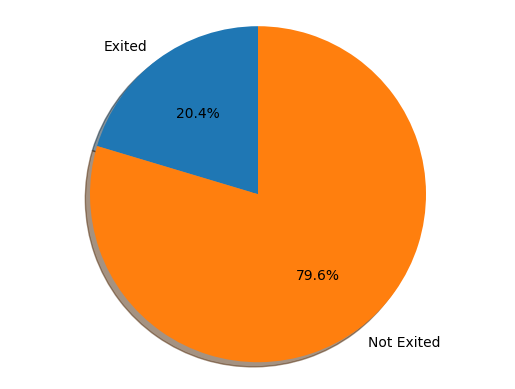

In [5]:
labels = 'Exited', 'Not Exited'

sizes = [df['Exited'].value_counts()[1], df['Exited'].value_counts()[0]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

The pie chart shows that most customers in the dataset have not churned, indicating that the dataset is imbalanced.

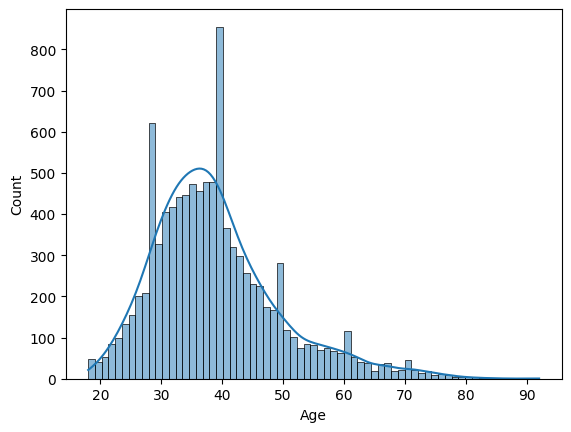

In [6]:
sns.histplot(x='Age', data=df, kde=True)
plt.show()

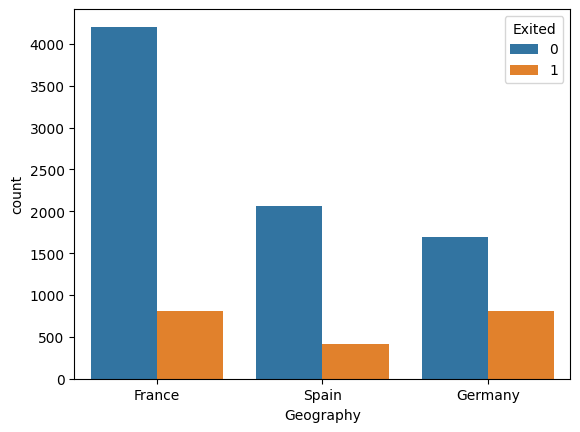

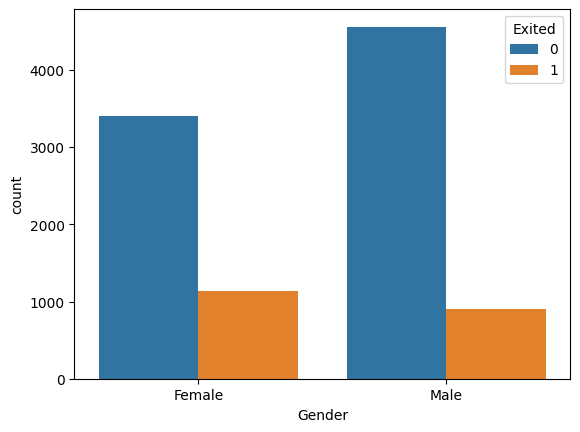

In [7]:
sns.countplot(x='Geography', hue='Exited', data=df)
plt.show()
sns.countplot(x='Gender', hue='Exited', data=df)
plt.show()

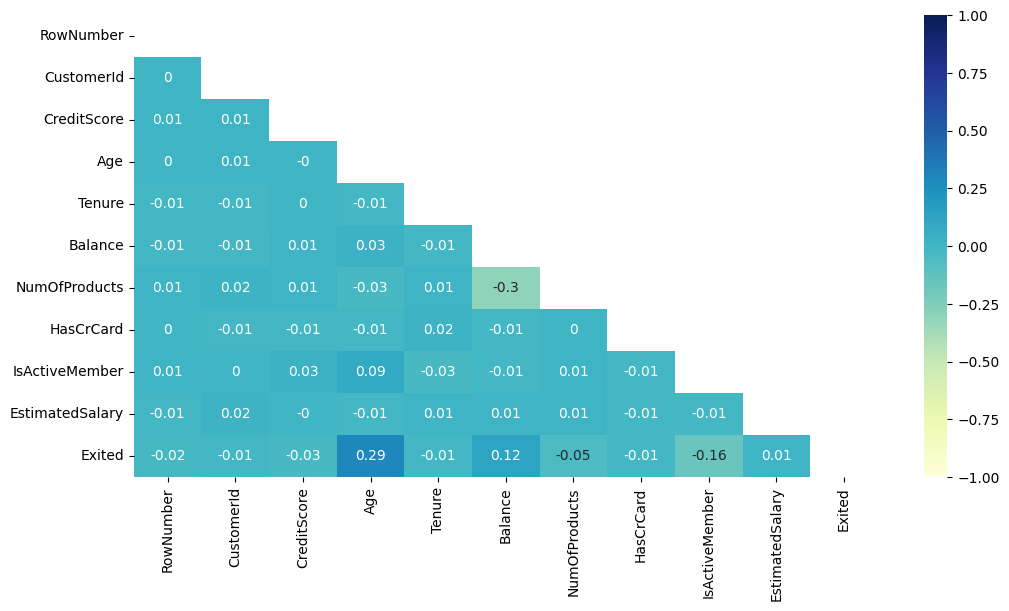

In [8]:
plt.figure(figsize=(12,6))
corr_matrix = df.corr(numeric_only=True).round(2)
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, center=0, cmap="YlGnBu", mask=mask);

# Data preprocessing

In [9]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
df = pd.get_dummies(df, columns=["Geography", "Gender"])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(["Exited", "RowNumber", "CustomerId", "Surname"], axis=1)
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

In [12]:
train_strat = sum(y_train)/len(y_train)
test_strat = sum(y_test)/len(y_test)
print("Training set proportion of 1s: ", train_strat)
print("Testing set proportion of 1s: ", test_strat)

Training set proportion of 1s:  0.20375
Testing set proportion of 1s:  0.2035


# Build Baseline Models

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score

In [14]:
dt = DecisionTreeClassifier(random_state=2)
rf = RandomForestClassifier(random_state=3)
ab = AdaBoostClassifier(random_state=3)
gb = GradientBoostingClassifier(random_state=3)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
ab.fit(X_train, y_train)
gb.fit(X_train, y_train)

y_pred = dt.predict(X_test)
for model in [dt, rf, ab, gb]:
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    print (model.__class__.__name__ + " F1 score:", f1)

DecisionTreeClassifier F1 score: 0.5150812064965197
RandomForestClassifier F1 score: 0.5966514459665144
AdaBoostClassifier F1 score: 0.5797101449275363
GradientBoostingClassifier F1 score: 0.5990922844175492


# Hyperparameter Optimization

In [15]:
from sklearn.model_selection import RandomizedSearchCV # *

* I started off using GridSearchCV, but it was taking so long that I had time to write a novel, paint a portrait, and learn a new language. So, I decided to switch to RandomizedSearchCV, which not only saved me time, but also added a sense of excitement to the hyperparameter tuning process. It's like spinning a wheel of fortune, but with hyperparameters instead of money – a true intellectual rollercoaster!

##### Decision Tree

In [16]:
dt_param_dist = {'max_depth': [3, 5, 7, 9, None],
                 'min_samples_split': [2, 5, 10, 15, 20],
                 'min_samples_leaf': [1, 2, 5, 10, 15],
                 'max_features': ['sqrt', 'log2', None]}

dt_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=3),
    dt_param_dist,
    cv=5,
    n_iter=10,
    random_state=0,
    n_jobs=-1,
    scoring='f1'
)

dt_search.fit(X_train, y_train)

best_dt = DecisionTreeClassifier(
    max_depth=dt_search.best_params_['max_depth'],
    min_samples_split=dt_search.best_params_['min_samples_split'],
    min_samples_leaf=dt_search.best_params_['min_samples_leaf'],
    max_features=dt_search.best_params_['max_features'],
    random_state=3
)

best_dt.fit(X_train, y_train)

y_pred = best_dt.predict(X_test)
f1 = f1_score(y_test, y_pred)

print("Decision Tree final F1 score:", f1)
print("Best parameters:", dt_search.best_params_)

Decision Tree final F1 score: 0.5635528330781011
Best parameters: {'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 7}


##### Random Forest

In [17]:
rf_param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': ['sqrt', 'log2', None]
}

rf_search = RandomizedSearchCV(RandomForestClassifier(random_state=0),
                               rf_param_dist,
                               cv=5,
                               n_iter=10,
                               n_jobs=-1,
                               scoring='f1',
                               random_state=0)

rf_search.fit(X_train, y_train)

best_rf = RandomForestClassifier(random_state=3,
                                 n_estimators=rf_search.best_params_['n_estimators'],
                                 max_depth=rf_search.best_params_['max_depth'],
                                 min_samples_split=rf_search.best_params_['min_samples_split'],
                                 min_samples_leaf=rf_search.best_params_['min_samples_leaf'],
                                 max_features=rf_search.best_params_['max_features'])

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)
f1 = f1_score(y_test, y_pred)

print("Random Forest final F1 score:", f1)
print("Best parameters:", rf_search.best_params_)

Random Forest final F1 score: 0.6032689450222883
Best parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 9}


##### AdaBoost

In [18]:
ab_param_dist = {'n_estimators': [50, 100, 150, 200, 250],
                 'learning_rate': [0.001, 0.01, 0.1, 1.0]}

ab_search = RandomizedSearchCV(AdaBoostClassifier(random_state=3), ab_param_dist, cv=5, n_iter=10, scoring='f1', random_state=0, n_jobs=-1)

ab_search.fit(X_train, y_train)

best_ab = AdaBoostClassifier(random_state=3, n_estimators=ab_search.best_params_['n_estimators'], learning_rate=ab_search.best_params_['learning_rate'])
best_ab.fit(X_train, y_train)

y_pred = best_ab.predict(X_test)
f1 = f1_score(y_test, y_pred)

print("AdaBoost final F1 score:", f1)
print("Best parameters:", ab_search.best_params_)

AdaBoost final F1 score: 0.5846599131693199
Best parameters: {'n_estimators': 150, 'learning_rate': 1.0}


##### Gradient Boosting

In [19]:
gb_param_dist = {'n_estimators': [50, 100, 150, 200, 250],
                 'learning_rate': [0.001, 0.01, 0.1, 1.0],
                 'max_depth': [3, 5, 7, 9, None],
                 'min_samples_split': [2, 5, 10, 15, 20],
                 'min_samples_leaf': [1, 2, 5, 10, 15]}

gb_search = RandomizedSearchCV(GradientBoostingClassifier(), gb_param_dist, cv=5, n_iter=10, scoring='f1', random_state=42, n_jobs=-1)

gb_search.fit(X_train, y_train)

best_gb = GradientBoostingClassifier(n_estimators=gb_search.best_params_['n_estimators'], learning_rate=gb_search.best_params_['learning_rate'], max_depth=gb_search.best_params_['max_depth'], min_samples_split=gb_search.best_params_['min_samples_split'], min_samples_leaf=gb_search.best_params_['min_samples_leaf'])

best_gb.fit(X_train, y_train)

y_pred = best_gb.predict(X_test)
f1 = f1_score(y_test, y_pred)

print("Gradient Boosting final f1 score:", f1)
print("Best parameters:", gb_search.best_params_)

Gradient Boosting final f1 score: 0.6056129985228952
Best parameters: {'n_estimators': 250, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.1}


# Performance Metrics of the Models

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [21]:
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

models = ['Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
for i, model in enumerate([best_dt, best_rf, best_ab, best_gb]):
    y_pred = model.predict(X_test)
    results_df.loc[i] = [
        models[i],
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred)
    ]

results_df.sort_values(by='F1 Score', ascending=False, inplace=True)
display(results_df)

,Model,Accuracy,Precision,Recall,F1 Score,AUC
3,Gradient Boosting,0.8665,0.759259,0.503686,0.605613,0.731441
1,Random Forest,0.8665,0.763158,0.498771,0.603269,0.729612
2,AdaBoost,0.8565,0.711268,0.496314,0.584660,0.722420
0,Decision Tree,0.8575,0.747967,0.452088,0.563553,0.706584


The model performance results are in! Based on the F1 Score, it looks like Gradient Boosting and Random Forest performed the best, with similar accuracy and precision scores. While AdaBoost and Decision Tree did not perform as well, they still have reasonable scores. Overall, it's great to see that all the models had decent results and could potentially be useful in predicting heart disease.

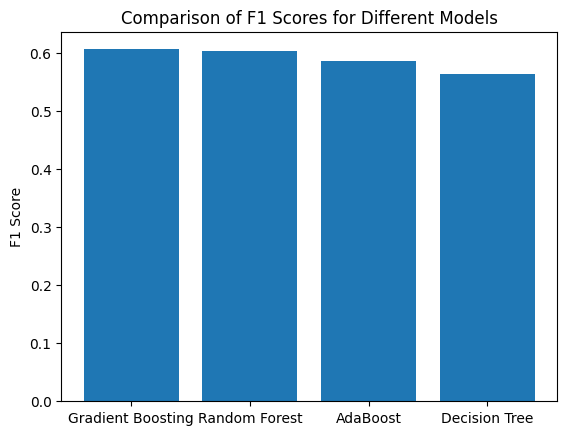

In [22]:
f1_scores = results_df['F1 Score'].tolist()
model_names = results_df['Model'].tolist()

fig, ax = plt.subplots()
ax.bar(model_names, f1_scores)
ax.set_ylabel('F1 Score')
ax.set_title('Comparison of F1 Scores for Different Models')

plt.show()

This bar chart compares the F1 scores of our different churn prediction models. It's like comparing apples and oranges, but in this case, it's more like comparing Gradient Boosting and Random Forest, which performed almost identically and tasted the sweetest. AdaBoost and Decision Tree came in second and third place, respectively, but still deserve a pat on the back for their efforts. Overall, it's clear that some models are just more ripe for the picking than others, so if you want to predict churn, go with one of the top performers.

In conclusion, this churn modelling project was a wild ride, but we made it to the end. We sliced, diced, and juiced our data, trained and evaluated different models, and came out with some juicy results. But as with any fruit, there's always room for improvement. With more data and better feature engineering, we could potentially get an even bigger yield. For now, let's raise a glass to our success and get ready for the next adventure!